In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, roc_auc_score,classification_report


In [36]:
df = pd.read_csv('cleaned_data.csv')

In [37]:
df.head(5)

,Sno,Property Type,beds,bathroom,Address,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking,Type of ownership,booking amount,buy total price
0,9,Villa/Townhouse,4.0,5.0,Luxury 4 bedroom villa with pool and sea views...,Porto,Portugal,101733.176642,Repaired,1519.792701,72231.0,Semi Furnished,South,False,Sole Ownership,12145744,323989209
1,10,Villa/Townhouse,4.0,5.0,Luxury 4 bedroom villa with pool and sea views...,Porto,Portugal,101733.176642,Repaired,1519.792701,71733.0,Furnished,North,False,Sole Ownership,14962182,315051648
2,11,Villa/Townhouse,4.0,5.0,Luxury 4 bedroom villa with pool and sea views...,Porto,Portugal,101733.176642,Repaired,1519.792701,71899.0,Furnished,West,False,Sole Ownership,11880425,315051648
3,18,Residence/Apartment,4.0,4.0,"New Penthouse duplex with balcony, for sale, i...",Porto,Portugal,101733.176642,Constructed,2022.000000,59181.0,Unfurnished,West,False,Sole Ownership,13423049,286004283
4,30,Residence/Apartment,4.0,4.0,"New Penthouse duplex with balcony, for sale, i...",Porto,Portugal,101733.176642,Constructed,2022.000000,62008.0,Unfurnished,South,False,Sole Ownership,8705074,223440857


In [38]:
df.shape

(1593, 17)

In [39]:
df.describe()

,Sno,beds,bathroom,carpetarea,Year Built,price per square feet,booking amount,buy total price
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1.593000e+03,1.593000e+03
mean,1857.538606,4.081607,3.822348,32570.608843,1876.388128,183779.667137,7.943451e+06,1.974221e+08
std,910.906466,1.269915,1.320672,44161.556576,208.348494,176082.805322,4.399514e+06,1.040407e+08
min,9.000000,2.000000,2.000000,1226.000000,1519.792701,36573.000000,4.533360e+05,9.974400e+06
25%,1302.000000,3.000000,3.000000,3500.000000,1519.792701,51119.000000,4.607092e+06,1.163680e+08
50%,1892.000000,4.000000,4.000000,5224.000000,1998.000000,77052.000000,6.724491e+06,1.658244e+08
75%,2439.000000,5.000000,4.000000,101733.176642,2018.000000,447052.086618,1.034038e+07,2.520128e+08
max,3465.000000,8.000000,11.000000,135626.000000,2026.000000,447052.086618,2.414852e+07,4.951830e+08


# Removing Sno and address column as it will not help in predicting any outcome

In [40]:
del df['Sno']
del df['Address']

In [41]:
### Rounding off Year Build column values to Closest integers
df['Year Built'] = df['Year Built'].round(0).astype(int)


# Converting categorical data into numerical encoded one by using 
## 1. Label Encoding: This assigns each category a unique integer value.
## 2. One-Hot Encoding: This creates a new binary column for each category.

### we will be using Lable Encoding as it does not increase the number of columns and we have many categorical columns present so if we use One-Hot encoding we will end up with significant big size of dataframe in terms of columns.

In [42]:
df.head(1)

,Property Type,beds,bathroom,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking,Type of ownership,booking amount,buy total price
0,Villa/Townhouse,4.0,5.0,Porto,Portugal,101733.176642,Repaired,1520,72231.0,Semi Furnished,South,False,Sole Ownership,12145744,323989209


In [43]:
label_encoder = LabelEncoder()

df['Property Type'] = label_encoder.fit_transform(df['Property Type'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['status'] = label_encoder.fit_transform(df['status'])
df['furnished status'] = label_encoder.fit_transform(df['furnished status'])
df['facing'] = label_encoder.fit_transform(df['facing'])
df['Car Parking'] = label_encoder.fit_transform(df['Car Parking'])
df['Type of ownership'] = label_encoder.fit_transform(df['Type of ownership'])

In [44]:
df.head(5)

,Property Type,beds,bathroom,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking,Type of ownership,booking amount,buy total price
0,9,4.0,5.0,8,1,101733.176642,2,1520,72231.0,1,2,0,5,12145744,323989209
1,9,4.0,5.0,8,1,101733.176642,2,1520,71733.0,0,1,0,5,14962182,315051648
2,9,4.0,5.0,8,1,101733.176642,2,1520,71899.0,0,3,0,5,11880425,315051648
3,7,4.0,4.0,8,1,101733.176642,0,2022,59181.0,2,3,0,5,13423049,286004283
4,7,4.0,4.0,8,1,101733.176642,0,2022,62008.0,2,2,0,5,8705074,223440857


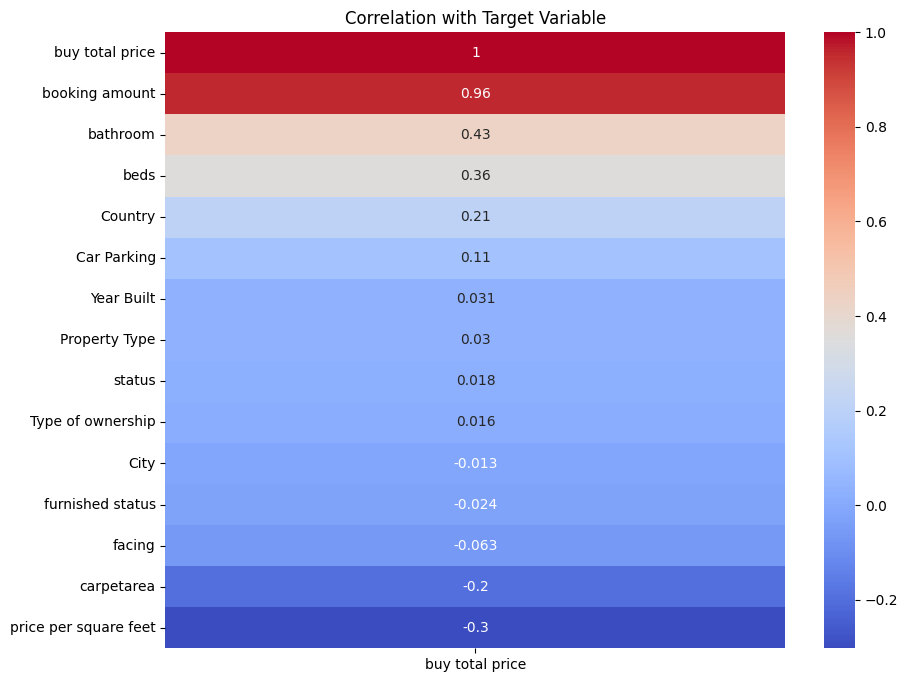

In [45]:
corr_matrix = df.corr()

# Plot the heatmap for correlation with the target
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['buy total price']].sort_values(by='buy total price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Target Variable')
plt.show()

# For predicting total_price as output

In [46]:
Y = df['buy total price']
X = df.drop(columns = ['buy total price'])

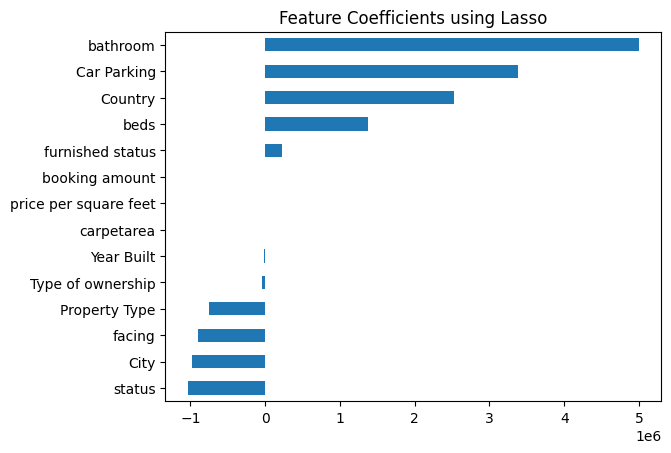

In [47]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, Y)

# Get coefficients
coefficients = pd.Series(lasso.coef_, index=X.columns)

# Plot coefficients
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Coefficients using Lasso')
plt.show()

## it seems from above analysis the booking_amount, price_per_square_feet, carpet_area, year_build and type_of_ownership have no kind of linear relation with our target column, but in reality we know that price_per_square_feet, carpet_area and year_build are important deciding features for a buying a house so we will keep them
## we can remove booking_amount and type_of_ownership as they dont align with real world importance when selecting a house

In [53]:
del X['Type of ownership']
del X['booking amount']

In [51]:
df.head(2)

,Property Type,beds,bathroom,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking,buy total price
0,9,4.0,5.0,8,1,101733.176642,2,1520,72231.0,1,2,0,323989209
1,9,4.0,5.0,8,1,101733.176642,2,1520,71733.0,0,1,0,315051648


### Scaling continous columns

In [50]:
scaler = StandardScaler()

columns_to_scale = ['carpetarea', 'price per square feet']

X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [54]:
X.head(2)

,Property Type,beds,bathroom,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking
0,9,4.0,5.0,8,1,1.566618,2,1520,-0.633700,1,2,0
1,9,4.0,5.0,8,1,1.566618,2,1520,-0.636529,0,1,0


In [55]:
Y.head(2)

0    323989209
1    315051648
Name: buy total price, dtype: int64

### Splitting data into training and testing dataset

In [56]:
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 355)

In [67]:
clf = DecisionTreeRegressor()
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [68]:
y_pred = clf.predict(x_test)

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Mean Absolute Error (MAE): 31721334.33082707
Mean Squared Error (MSE): 2795271067612893.5
Root Mean Squared Error (RMSE): 52870323.127562724
R-squared (R²): 0.7399394900842113
Adjusted R-squared: 0.7318547073925288


# For predicting Property Type

In [72]:
df.head(2)

,Property Type,beds,bathroom,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking,buy total price
0,9,4.0,5.0,8,1,101733.176642,2,1520,72231.0,1,2,0,323989209
1,9,4.0,5.0,8,1,101733.176642,2,1520,71733.0,0,1,0,315051648


In [73]:
Y = df['Property Type']
X = df.drop(columns = ['Property Type'])

### Scaling continous columns

In [74]:
scaler = StandardScaler()

columns_to_scale = ['carpetarea', 'price per square feet','buy total price']

X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [75]:
X.head(2)

,beds,bathroom,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking,buy total price
0,4.0,5.0,8,1,1.566618,2,1520,-0.633700,1,2,0,1.216897
1,4.0,5.0,8,1,1.566618,2,1520,-0.636529,0,1,0,1.130966


### Splitting data into training and testing dataset

In [76]:
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 355)

In [80]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.8897243107769424
Confusion Matrix:
[[  0   1   0   0   0   4   0]
 [  0  40   0   0   0   8   0]
 [  0   0   0   0   0   1   0]
 [  0   0   0   0   4   0   2]
 [  0   0   0   0  39   1  10]
 [  0   4   0   0   0 217   0]
 [  0   1   0   0   5   3  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           2       0.87      0.83      0.85        48
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         6
           7       0.81      0.78      0.80        50
           8       0.93      0.98      0.95       221
           9       0.83      0.87      0.85        68

    accuracy                           0.89       399
   macro avg       0.49      0.49      0.49       399
weighted avg       0.86      0.89      0.88       399



C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sharm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### As we can see from above classification report property_Type = ( 0,3,6 ) have 0 values as they have very less samples as compared to (2,7,8,9)

# For predicting carpet_area as output

In [85]:
Y = df['carpetarea']
X = df.drop(columns = ['carpetarea'])

In [86]:
df.head(2)

,Property Type,beds,bathroom,City,Country,carpetarea,status,Year Built,price per square feet,furnished status,facing,Car Parking,buy total price
0,9,4.0,5.0,8,1,101733.176642,2,1520,72231.0,1,2,0,323989209
1,9,4.0,5.0,8,1,101733.176642,2,1520,71733.0,0,1,0,315051648


In [87]:
scaler = StandardScaler()

columns_to_scale = ['price per square feet','buy total price']

X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [88]:
X.head(2)

,Property Type,beds,bathroom,City,Country,status,Year Built,price per square feet,furnished status,facing,Car Parking,buy total price
0,9,4.0,5.0,8,1,2,1520,-0.633700,1,2,0,1.216897
1,9,4.0,5.0,8,1,2,1520,-0.636529,0,1,0,1.130966


In [89]:
x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 355)

In [90]:
clf = RandomForestRegressor()

# Train the model
clf.fit(x_train, y_train)

RandomForestRegressor()

In [91]:
y_pred = clf.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Mean Absolute Error (MAE): 6912.123000054868
Mean Squared Error (MSE): 290732132.6095131
Root Mean Squared Error (RMSE): 17050.8689693374
R-squared (R²): 0.833055718034177
Adjusted R-squared: 0.8278657403564831
